In this project, we'll work with a dataset of fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration.  

_Dataset description_ :
The data provided in this [Github link]('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv') is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

**'Record_id' :** record id  
**'Utility_id_ferc1':** Utility id assigned by the FERC  
**'Report_year':** year of report  
**'Plant_name_ferc1':** the name of the plant  
**'Fuel_type_code_pudl':** the type of fuel  
**'Fuel_unit':** the unit of fuel  
**'Fuel_qty_burned'**: the quantity of fuel burned  
**'Fuel_mmbtu_per_unit'**: the measure of energy per unit  
**'fuel_cost_per_unit_burned'**: the fuel cost per unit burned  
**'Fuel_cost_per_unit_delivered'**: the cost of fuel delivered per unit  
**'fuel_cost_per_mmbtu'**: the cost of fuel per mmbtu  

**The aim of this project is to cleaning, wrangling, exploring, providing summary statistics and interesting visualisations on a public utility data containing millions of rows and tens of files in structured format.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fuel_data = pd.read_csv('fuel_ferc1.csv')
df = pd.read_csv('fuel_ferc1.csv')

Let's have a look of few rows in our dataset

In [3]:
fuel_data.head(20)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.770,0.000,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.730,28.110,1.278


Let's display general descriptive statistics about our dataset (The values will be printed with normal notation as _Int_)

In [5]:
fuel_data.describe().apply(lambda x:  x.astype('int64'))

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523,29523,29523,29523,29523,29523
mean,118,2005,2622119,8,208,917,19
std,74,7,9118003,10,2854,68775,2091
min,1,1994,1,0,-276,-874,-41
25%,55,2000,13817,1,5,3,1
50%,122,2006,253322,5,26,17,4
75%,176,2012,1424034,17,47,42,7
max,514,2018,555894250,341,139358,7964521,359278


Displaying of some informations abou our Dataset

In [6]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


** **
The columns **record_id, plant_name_ferc1, fuel_type_code_pudl, fuel_unit** the datatype is **object**  
The columns **fuel_qty_burned, fuel_mmbtu_per_unit, fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered, fuel_cost_per_mmbtu** the datatype is **float64**  
The columns **utility_id_ferc1, report_year**  the datatype is **int64**   
** **

## Detecting Missing Values

In [7]:
#Show columns with missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

The columns **fuel_unit** has null values, others columns seems to be correct

In [8]:
# Show rows with  missing values
fuel_data[fuel_data.isnull().any(axis=1)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.770,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.000,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.000,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.000,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.000,0.480
...,...,...,...,...,...,...,...,...,...,...,...
28413,f1_fuel_2017_12_227_0_13,227,2017,vestaburg,gas,NaN,24196.0,1.000000,20.131,4.494,4.494
28828,f1_fuel_2018_12_148_0_12,148,2018,northeastern 3,oil,NaN,11.0,4.966164,64.080,64.080,12.860
28830,f1_fuel_2018_12_148_0_14,148,2018,comanche,oil,NaN,96.0,5.751942,34.130,34.130,5.930
29052,f1_fuel_2018_12_162_0_1,162,2018,ernest c. gaston,coal,NaN,1610370.0,21.660000,70.461,65.240,3.254


Are there any rows with only missing values ?

In [9]:
fuel_data[fuel_data.isnull().all(axis=1)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


### Handling missing values

In [10]:
fuel_data['fuel_unit'].value_counts(dropna=False)

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
NaN         180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

Let's us retrieve for all fuel_unit the fuel_type_code with most values

In [11]:
# fuel_dict = {}
# for fuel_type in fuel_data['fuel_type_code_pudl'].unique():
#     fuel_unit_max = fuel_data[fuel_data['fuel_type_code_pudl'] == fuel_type]['fuel_unit'].value_counts().sort_values(ascending=False).index[0]
#     fuel_dict[fuel_type] = fuel_unit_max
# fuel_dict

In [12]:
fuel_group_unit = fuel_data.groupby([fuel_data['fuel_type_code_pudl'], fuel_data['fuel_unit']])
fuel_group_unit.size()

fuel_type_code_pudl  fuel_unit
coal                 bbl              1
                     mcf              5
                     mmbtu           52
                     ton           8438
gas                  bbl              2
                     mcf          11333
                     mmbtu           94
                     ton              4
nuclear              gramsU         464
                     kgU            110
                     mmbtu           34
                     mwdth           95
                     mwhth          100
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                bbl             42
                     gal              3
                     mcf              9
                     ton             77
waste                bbl              1
                     ton            436
dtype: int64

In [13]:
#fuel_data.groupby([fuel_data['fuel_type_code_pudl'], fuel_data['fuel_unit']]).size().plot(kind='bar')

Let's fill missing values with the mode of each fuel_type group

In [14]:
fuel_data['fuel_unit'] = fuel_data.groupby('fuel_type_code_pudl')['fuel_unit'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [15]:
fuel_data['fuel_unit'].isnull().sum()

0

Some has columns has negatives values. Let's display them.

In [16]:
# df.loc[(df['fuel_cost_per_unit_burned'] <  0)].sort_values(by='fuel_type_code_pudl') ['fuel_cost_per_unit_burned'] ['fuel_cost_per_unit_delivered'] ['fuel_cost_per_mmbtu']
negative_values_rows = fuel_data.loc[(df['fuel_cost_per_unit_burned'] <  0)  | (fuel_data['fuel_cost_per_unit_burned'] <  0 ) | (fuel_data['fuel_cost_per_unit_delivered'] <  0 ) | (fuel_data['fuel_cost_per_mmbtu'] <  0 )]
negative_values_rows.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
434,f1_fuel_1994_12_121_0_14,121,1994,french island,waste,ton,51728.0,0.005846,-35.100,-35.38,-3.003
516,f1_fuel_1994_12_194_5_9,194,1994,rock river,waste,ton,4650.0,0.014370,-57.450,-58.80,-2.000
518,f1_fuel_1994_12_194_5_12,194,1994,rock river unit 2,waste,ton,4231.0,0.014668,-57.490,-58.80,-1.959
520,f1_fuel_1994_12_194_5_15,194,1994,rock river units 1&2,waste,ton,8881.0,0.014512,-57.470,-58.80,-1.980
2117,f1_fuel_1995_12_194_4_9,194,1995,nelson dewey unit 1,waste,ton,1047.0,0.013429,-53.630,-53.56,-1.996
2119,f1_fuel_1995_12_194_4_12,194,1995,nelson dewey unit 2,waste,ton,869.0,0.013429,-53.630,-53.56,-1.996
2121,f1_fuel_1995_12_194_4_15,194,1995,nelson dewey 1 & 2,waste,ton,1916.0,0.013429,-53.630,-53.56,-1.996
2123,f1_fuel_1995_12_194_5_9,194,1995,rock river unit 1,waste,ton,6072.0,0.013457,-85.760,-85.64,-3.186
2125,f1_fuel_1995_12_194_5_12,194,1995,rock river unit 2,waste,ton,5377.0,0.013417,-85.750,-85.64,-3.195
2334,f1_fuel_1995_12_121_0_14,121,1995,french island,waste,ton,47190.0,0.006042,-42.679,-42.29,-3.532


In [17]:
#We can deleted them or fill them with np.nan and later with the mean values of each correponding columns
fuel_data.drop(negative_values_rows.index, inplace=True)

## Some insights and statitics

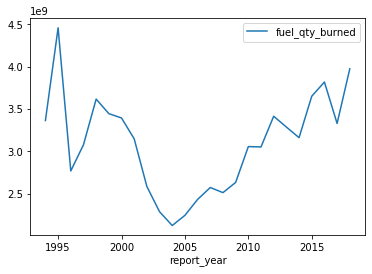

In [18]:
#Quantity of fuel burned by year
#print(fuel_data.groupby('report_year')['fuel_qty_burned'].sum().astype('int64'))
qty_fuel_year = fuel_data.groupby('report_year')[['fuel_qty_burned']].sum().astype('int64')

qty_fuel_year.plot()

fuel_type_code_pudl
coal       16268654347
gas        55628796696
nuclear     4462057832
oil          508924962
other        492324093
waste         50780257
Name: fuel_qty_burned, dtype: int64


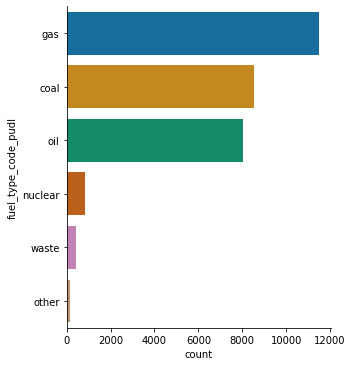

In [19]:
#Quantity of fuel burned by year
print(fuel_data.groupby('fuel_type_code_pudl')['fuel_qty_burned'].sum().astype('int64'))

sns.catplot(y='fuel_type_code_pudl', data = fuel_data.dropna(),kind='count', 
            order=fuel_data.fuel_type_code_pudl.value_counts().index, palette='colorblind')



In [20]:
#Quantity of fuel burned by year group by fuel_unit
df.groupby(['report_year', 'fuel_unit']).fuel_qty_burned.sum().astype('int64')

report_year  fuel_unit
1994         bbl             4168149
             gramsU         31489197
             kgU                5748
             mcf          2390380630
             mmbtu          61855417
                             ...    
2018         mcf          3434895004
             mmbtu          84468113
             mwdth            951784
             mwhth         113156061
             ton           323295980
Name: fuel_qty_burned, Length: 218, dtype: int64